In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Company Stock and Investment.csv')
data.head()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,31-12-2009,0.025417,0.000150,0.017354,0.006848
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609
2,05-01-2010,0.002699,0.001560,0.001729,0.005900
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013


In [3]:
oil_inv=data[['Date','Oil Investments']]
oil_inv.head()

,Date,Oil Investments
0,31-12-2009,0.025417
1,04-01-2010,0.026830
2,05-01-2010,0.002699
3,06-01-2010,0.021688
4,07-01-2010,-0.006256


In [4]:
oil_inv['Date']=pd.to_datetime(oil_inv['Date'])

In [5]:
oil_inv.sort_values('Date',inplace=True)

In [6]:
oil_inv.head()

,Date,Oil Investments
0,2009-12-31,0.025417
20,2010-01-02,0.021414
39,2010-01-03,-0.012669
62,2010-01-04,0.012942
103,2010-01-06,-0.017568


In [7]:
oil_inv.set_index('Date',inplace=True)

In [8]:
oil_inv.index

DatetimeIndex(['2009-12-31', '2010-01-02', '2010-01-03', '2010-01-04',
               '2010-01-06', '2010-01-07', '2010-01-09', '2010-01-10',
               '2010-01-11', '2010-01-12',
               ...
               '2017-11-13', '2017-11-14', '2017-11-15', '2017-12-01',
               '2017-12-04', '2017-12-05', '2017-12-06', '2017-12-07',
               '2017-12-09', '2017-12-10'],
              dtype='datetime64[ns]', name='Date', length=1984, freq=None)

In [9]:
oil_inv.describe()

,Oil Investments
count,1984.000000
mean,-0.000435
std,0.030869
min,-1.000000
25%,-0.011021
50%,0.000277
75%,0.010734
max,0.119511


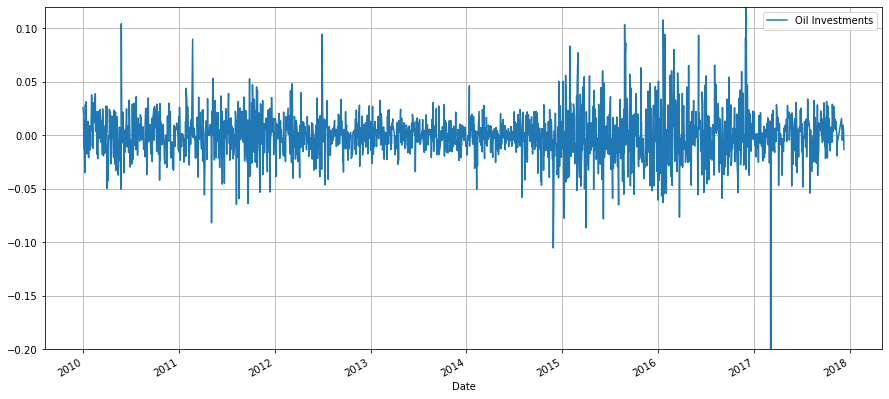

In [11]:
oil_inv.plot(figsize=(15,7))
plt.ylim(-0.2,0.12)
plt.grid()
plt.show()

In [19]:
from statsmodels.tsa.stattools import adfuller
oil_res=adfuller(oil_inv['Oil Investments'])
oil_res

(-44.89116438130484,
 0.0,
 0,
 1983,
 {'1%': -3.4336519592295947,
  '5%': -2.862998620943585,
  '10%': -2.567546508593341},
 -8040.172707507023)

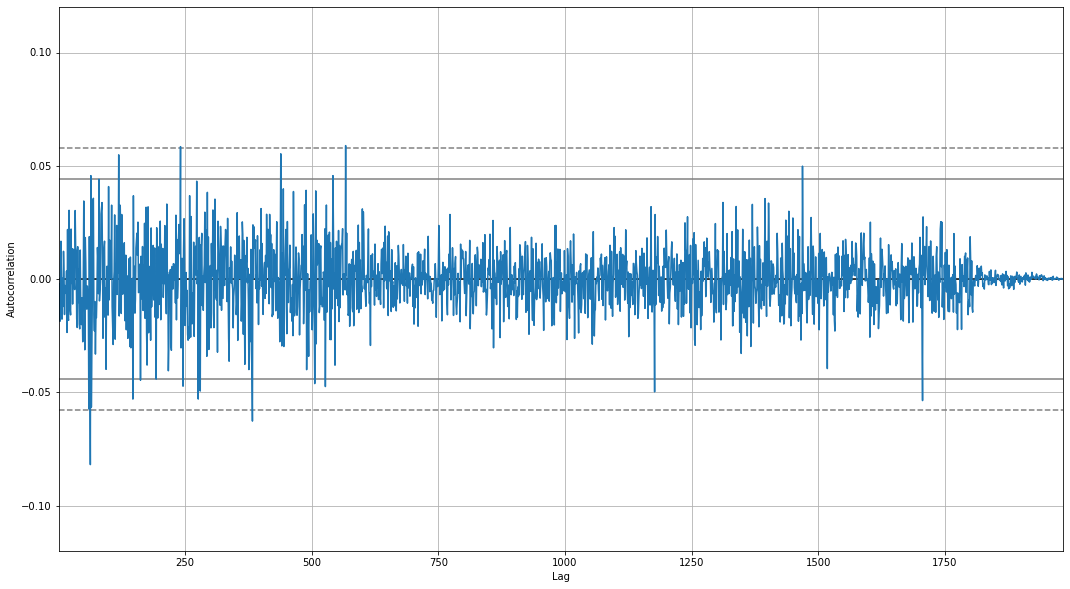

In [13]:
from pandas.plotting import autocorrelation_plot

fig=plt.figure(figsize=(18,10))
autocorrelation_plot(oil_inv['Oil Investments'])
plt.ylim(-0.12,0.12)
plt.show()

In [14]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

(-0.05, 0.05)

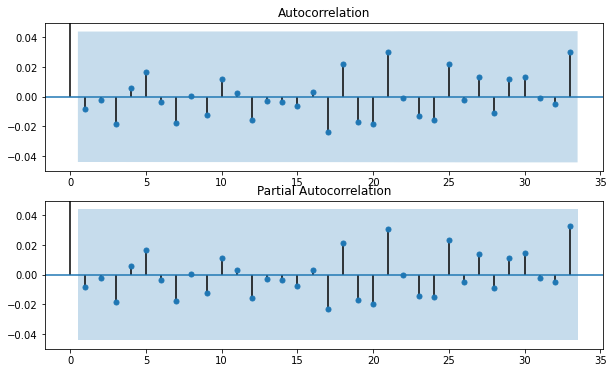

In [15]:
fig=plt.figure(figsize=(10,6))
ax1=plt.subplot(211)
fig=plot_acf(oil_inv['Oil Investments'],ax=ax1)
plt.ylim(-0.05,0.05)
ax2=plt.subplot(212)
fig=plot_pacf(oil_inv['Oil Investments'],ax=ax2)
plt.ylim(-0.05,0.05)

In [84]:
!pip install pmdarima

ERROR: tensorflow 2.1.0 has requirement scipy==1.4.1; python_version >= "3", but you'll have scipy 1.5.3 which is incompatible.
ERROR: tensorflow 2.1.0 has requirement tensorboard<2.2.0,>=2.1.0, but you'll have tensorboard 2.2.1 which is incompatible.
ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\users\\sindh\\.conda\\envs\\tensorflow\\lib\\site-packages\\~cipy\\fftpack\\convolve.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




  Attempting uninstall: scipy
    Found existing installation: scipy 1.1.0
    Uninstalling scipy-1.1.0:
      Successfully uninstalled scipy-1.1.0


In [83]:
from pmdarima import auto_arima

ModuleNotFoundError: No module named 'pmdarima'

In [23]:
from statsmodels.tsa.arima_model import ARIMA

model=ARIMA(oil_inv['Oil Investments'],order=(2,1,0))
model_f=model.fit()

C:\Users\sindh\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\sindh\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [24]:
model_f.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:      D.Oil Investments   No. Observations:                 1983
Model:                 ARIMA(2, 1, 0)   Log Likelihood                3786.611
Method:                       css-mle   S.D. of innovations              0.036
Date:                Sun, 01 Nov 2020   AIC                          -7565.223
Time:                        19:54:16   BIC                          -7542.853
Sample:                             1   HQIC                         -7557.006
                                                                              
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -1.115e-05      0.000     -0.028      0.978      -0.001       0.001
ar.L1.D.Oil Investments    -0.6657      0.021    -31.336      0.000      -0.707      -0.624
ar.L2.D.Oil Investments    -0.3235      0.021    -15.229      0.000      -0.365      -0.282
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0290           -1.4257j            1.7583           -0.3495
AR.2           -1.0290           +1.4257j            1.7583            0.3495
-----------------------------------------------------------------------------
"""

(-0.1, 0.1)

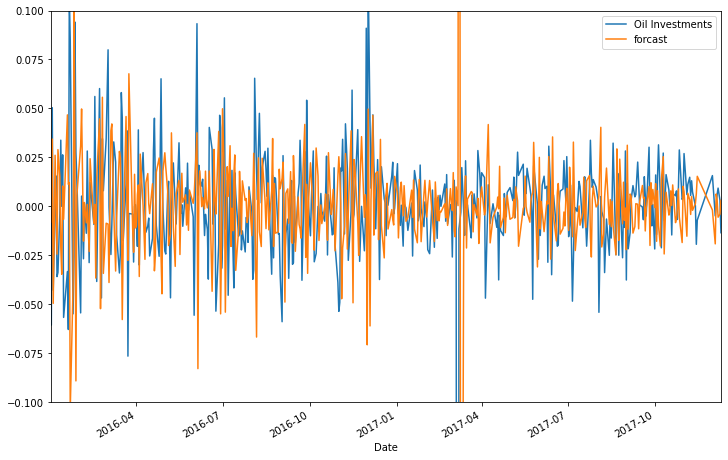

In [25]:
startdate=oil_inv.loc['2016-01-02']
enddate=oil_inv.loc['2017-12-10']
oil_inv['forcast']=model_f.predict(start='2016-01-02',end='2017-12-10',dynamic=False)
oil_inv[['Oil Investments','forcast']].plot(figsize=(12,8))
plt.xlim('2016-1-2','2017-12-10')
plt.ylim(-0.1,0.1)

In [28]:
index_future=pd.date_range(start='2017-12-10',end='2021-12-10')
pred=model_f.predict(start=len(oil_inv),end=len(oil_inv)+1461,typ='levels').rename('ARIMApred')
pred.index=index_future

C:\Users\sindh\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\sindh\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


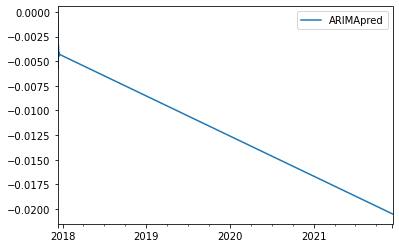

In [30]:
pred.plot(legend=True)

In [25]:
from pandas.tseries.offsets import DateOffset

In [26]:
from pandas.tseries.offsets import DateOffset
future_dates=[oil_inv.index[-1]+ DateOffset(months=x)for x in range(0,42)]
fut_dates=pd.DataFrame(index=future_dates[1:],columns=oil_inv.columns)
fut_dates.head()

,Oil Investments,forcast
2018-01-10,NaN,NaN
2018-02-10,NaN,NaN
2018-03-10,NaN,NaN
2018-04-10,NaN,NaN
2018-05-10,NaN,NaN


In [29]:
future_df=pd.concat([oil_inv,fut_dates])
future_df['forecast'] = model_f.predict(start ='2018-01-10',end='2021-05-10', dynamic= False)  
future_df[['Oil Invetment', 'forecast']].plot(figsize=(12, 8)) 

KeyError: 'only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices'

In [33]:
data=pd.read_csv('Company Stock and Investment.csv')
data.head()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,31-12-2009,0.025417,0.000150,0.017354,0.006848
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609
2,05-01-2010,0.002699,0.001560,0.001729,0.005900
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013


In [34]:
gold_inv=data[['Date','Gold Investments']]
gold_inv.head()

,Date,Gold Investments
0,31-12-2009,0.000150
1,04-01-2010,0.001097
2,05-01-2010,0.001560
3,06-01-2010,0.006009
4,07-01-2010,0.000221


In [35]:
gold_inv['Date']=pd.to_datetime(gold_inv['Date'])
gold_inv.sort_values('Date',inplace=True)
gold_inv.set_index('Date',inplace=True)

In [36]:
gold_inv.head()

,Gold Investments
Date,
2009-12-31,0.000150
2010-01-02,0.007418
2010-01-03,0.005188
2010-01-04,0.007172
2010-01-06,0.016770


<Figure size 2160x720 with 0 Axes>

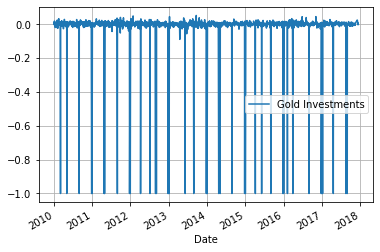

In [37]:
plt.figure(figsize=(30,10))
gold_inv.plot()
plt.grid()

In [38]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(gold_inv['Gold Investments'])
result

(-18.280785785549348,
 2.308597797492006e-30,
 3,
 1980,
 {'1%': -3.433656968706682,
  '5%': -2.863000832624789,
  '10%': -2.567547686205489},
 -2149.4141130888092)

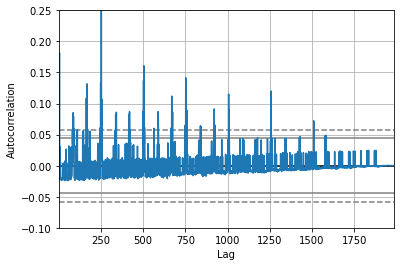

In [39]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(gold_inv['Gold Investments'])
plt.ylim(-0.1,0.25)
plt.show()


In [40]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig=plt.figure(figsize=(10,8))
ax1=fig.add_subplot(221)
fig=sm.
fig=plt.figure(figsize=(10,8))
ax2=fig.add_subplot(222)

SyntaxError: invalid syntax (<ipython-input-40-32648865ab85>, line 4)

In [58]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(gold_inv['Gold Investments'],order=(1,1,0))
model_fit=model.fit()

C:\Users\sindh\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\sindh\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [59]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:     D.Gold Investments   No. Observations:                 1983
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 651.257
Method:                       css-mle   S.D. of innovations              0.174
Date:                Sun, 01 Nov 2020   AIC                          -1296.515
Time:                        23:40:05   BIC                          -1279.738
Sample:                             1   HQIC                         -1290.352
                                                                              
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -2.013e-06      0.003     -0.001      0.999      -0.005       0.005
ar.L1.D.Gold Investments    -0.5003      0.019    -25.742      0.000      -0.538      -0.462
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.9990           +0.0000j            1.9990            0.5000
-----------------------------------------------------------------------------
"""

(-0.4, 0.4)

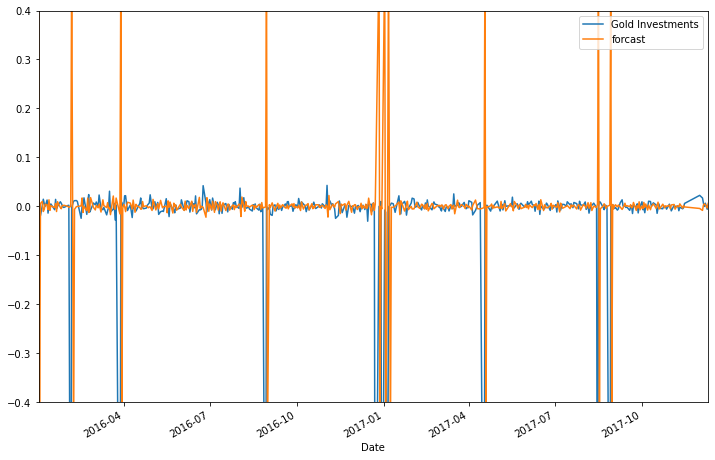

In [60]:
startdate=gold_inv.loc['2016-01-02']
enddate=gold_inv.loc['2017-12-10']
gold_inv['forcast']=model_fit.predict(start='2016-01-02',end='2017-12-10')
gold_inv[['Gold Investments','forcast']].plot(figsize=(12,8))
plt.xlim('2016-1-2','2017-12-10')
plt.ylim(-0.4,0.4)

In [61]:
index_future=pd.date_range(start='2017-12-10',end='2021-12-10')
pred_gold=model_fit.predict(start=len(gold_inv),end=len(gold_inv)+1461,typ='levels').rename('ARIMA_pred')
pred_gold.index=index_future

C:\Users\sindh\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\sindh\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


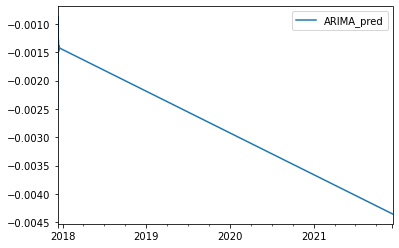

In [62]:
pred_gold.plot(legend=True)

In [46]:
data=pd.read_csv('Company Stock and Investment.csv')
data.head()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,31-12-2009,0.025417,0.000150,0.017354,0.006848
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609
2,05-01-2010,0.002699,0.001560,0.001729,0.005900
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013


In [47]:
Comp_Stock=data[['Date','Comp Stock']]
Comp_Stock.head()

,Date,Comp Stock
0,31-12-2009,0.017354
1,04-01-2010,0.015565
2,05-01-2010,0.001729
3,06-01-2010,-0.015906
4,07-01-2010,-0.001849


In [48]:
Comp_Stock['Date']=pd.to_datetime(Comp_Stock['Date'])
Comp_Stock.sort_values('Date',inplace=True)
Comp_Stock.set_index('Date',inplace=True)

<Figure size 2160x720 with 0 Axes>

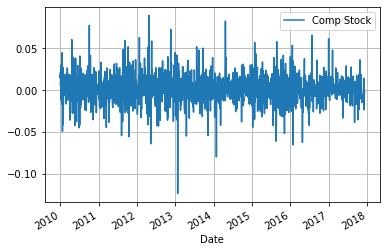

In [49]:
plt.figure(figsize=(30,10))
Comp_Stock.plot()
plt.grid()

In [50]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(Comp_Stock['Comp Stock'])
result

(-15.191309570811418,
 6.005097502012144e-28,
 9,
 1974,
 {'1%': -3.43366703339965,
  '5%': -2.8630052761696607,
  '10%': -2.567550052177805},
 -10649.445992980583)

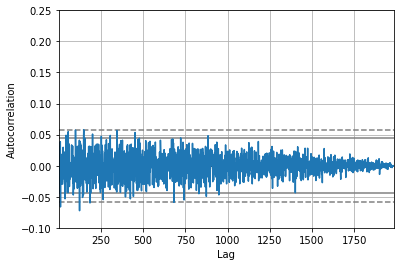

In [51]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(Comp_Stock['Comp Stock'])
plt.ylim(-0.1,0.25)
plt.show()


In [78]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(Comp_Stock['Comp Stock'],order=(2,1,0))
modelfit=model.fit()

C:\Users\sindh\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\sindh\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [74]:
modelfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Comp Stock   No. Observations:                 1983
Model:                 ARIMA(1, 1, 2)   Log Likelihood                5371.956
Method:                       css-mle   S.D. of innovations              0.016
Date:                Sun, 01 Nov 2020   AIC                         -10733.911
Time:                        23:42:54   BIC                         -10705.949
Sample:                             1   HQIC                        -10723.640
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.175e-06   6.33e-06     -0.186      0.853   -1.36e-05    1.12e-05
ar.L1.D.Comp Stock    -0.7575      0.031    -24.114      0.000      -0.819      -0.696
ma.L1.D.Comp Stock    -0.2105        nan        nan        nan         nan         nan
ma.L2.D.Comp Stock    -0.7599      0.078     -9.687      0.000      -0.914      -0.606
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3201           +0.0000j            1.3201            0.5000
MA.1            1.0170           +0.0000j            1.0170            0.0000
MA.2           -1.2940           +0.0000j            1.2940            0.5000
-----------------------------------------------------------------------------
"""

(-0.1, 0.1)

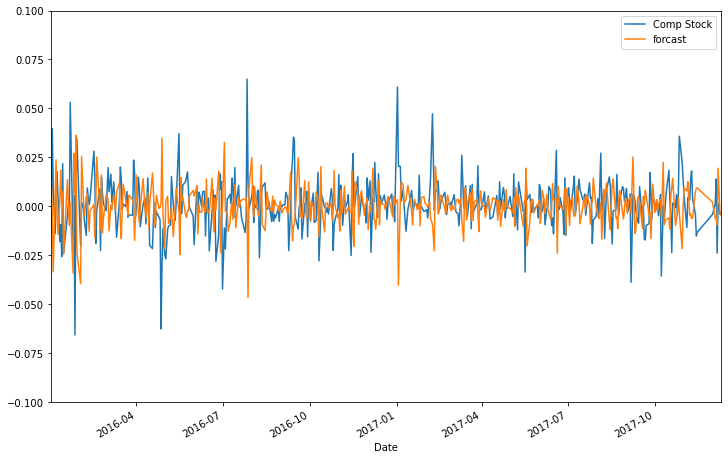

In [79]:
startdate=Comp_Stock.loc['2016-01-02']
enddate=Comp_Stock.loc['2017-12-10']
Comp_Stock['forcast']=modelfit.predict(start='2016-01-02',end='2017-12-10')
Comp_Stock[['Comp Stock','forcast']].plot(figsize=(12,8))
plt.xlim('2016-1-2','2017-12-10')
plt.ylim(-0.1,0.1)

In [80]:
index_future=pd.date_range(start='2017-12-10',end='2021-12-10')
pred_comp=modelfit.predict(start=len(Comp_Stock),end=len(Comp_Stock)+1461,typ='levels').rename('ARIMA_preds')
pred_comp.index=index_future

C:\Users\sindh\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\sindh\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


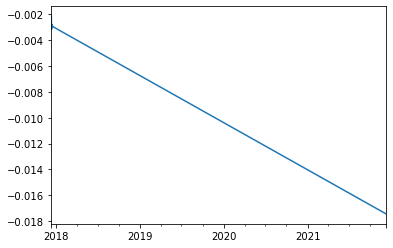

In [82]:
pred_comp.plot()